In [13]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [14]:
class QuadState(TypedDict):
    a: int
    b: int
    c: int
    
    equation: str
    discriminant: float
    result: str


#### Nodes

In [15]:
def show_equ(state: QuadState):
    equation = f'{state["a"]}x^2 {state["b"]}x{state["c"]}'
    print(equation)
    return {"equation": equation}

def cal_discriminant(state: QuadState):
    # b^2 - 4ac
    discriminant = state["b"]**2 - (4*state["a"] * state["c"])
    return {"discriminant": discriminant}

def no_real_roots(state: QuadState):
    return {"result": "No real roots"}
    
def repeat_roots(state: QuadState):
    root1 = (-state["b"])/(2*state["a"])
    return {"result": f"Only Reapted root is {root1}"}

def real_roots(state: QuadState):
    root1 = (-state["b"] + state["discriminant"]**0.5)/(2*state["a"])
    root2 = (-state["b"] - state["discriminant"]**0.5)/(2*state["a"])
    
    return {"result": f"The roots are {root1}, {root2}"}

def check_condition(state: QuadState) -> Literal["real_roots", "repeat_roots", "no_real_roots"]:
    if state['discriminant'] > 0:
        return "real_roots"
    elif state['discriminant'] == 0:
        return "repeat_roots"
    else:
        return "no_real_roots"

#### Graph

In [16]:
graph = StateGraph(QuadState)

graph.add_node('show_equ', show_equ)
graph.add_node('cal_discriminant', cal_discriminant)
graph.add_node('no_real_roots', no_real_roots)
graph.add_node('real_roots', real_roots)
graph.add_node('repeat_roots', repeat_roots)


graph.add_edge(START, "show_equ")
graph.add_edge("show_equ", "cal_discriminant")
graph.add_conditional_edges("cal_discriminant", check_condition)
graph.add_edge("no_real_roots", END)
graph.add_edge("real_roots", END)
graph.add_edge("repeat_roots", END)

#### Workflow

In [17]:
workflow = graph.compile()

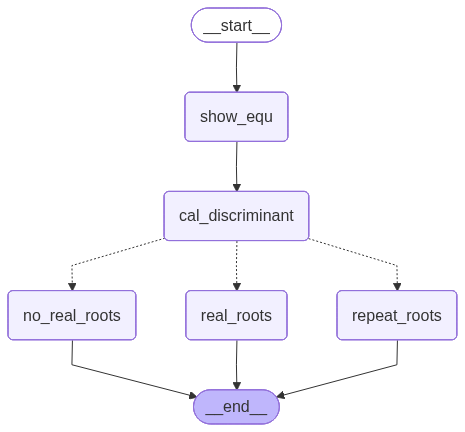

In [18]:
workflow

In [22]:
workflow.invoke({
    "a": 4,
    "b": 0,
    "c": 0,
})

4x^2 0x0


{'a': 4,
 'b': 0,
 'c': 0,
 'equation': '4x^2 0x0',
 'discriminant': 0,
 'result': 'Only Reapted root is 0.0'}